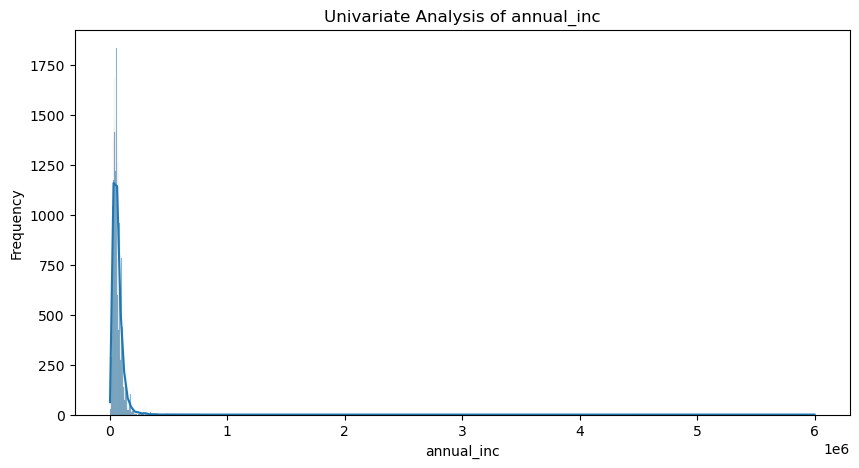

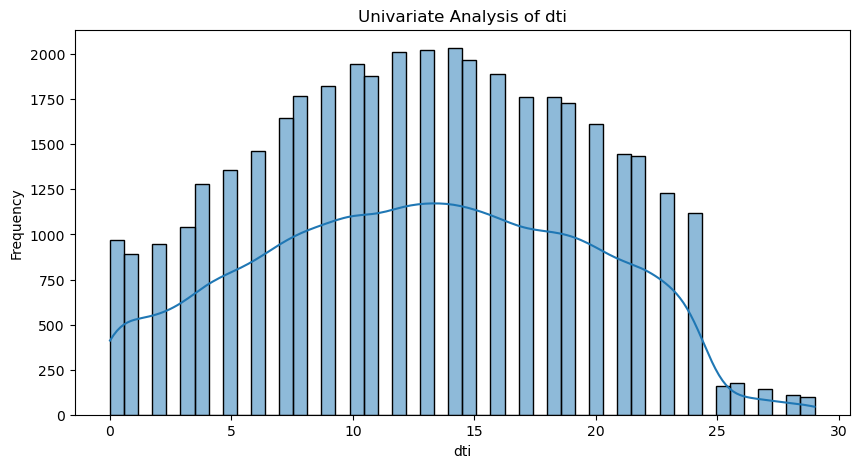

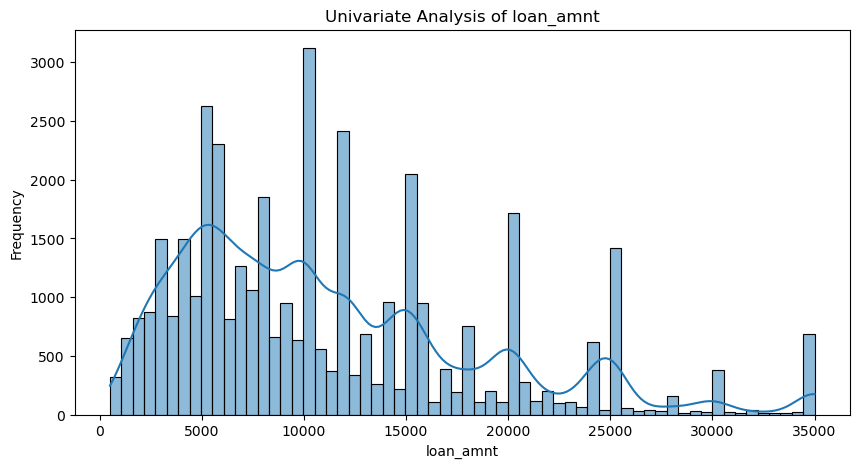

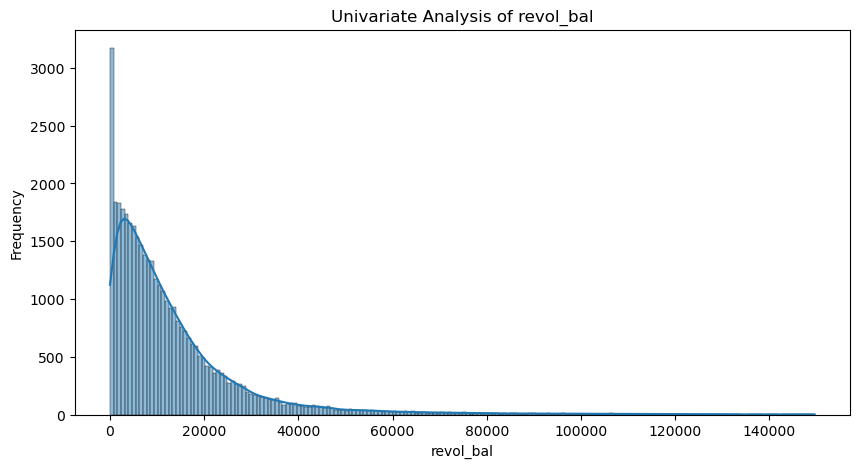

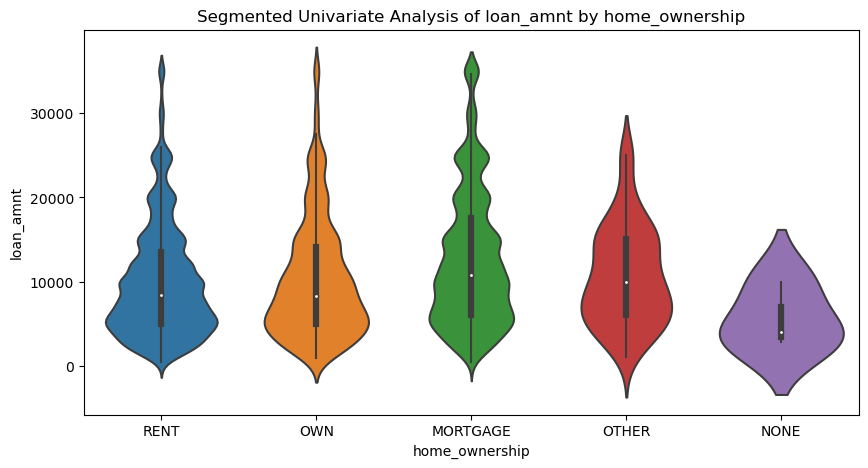

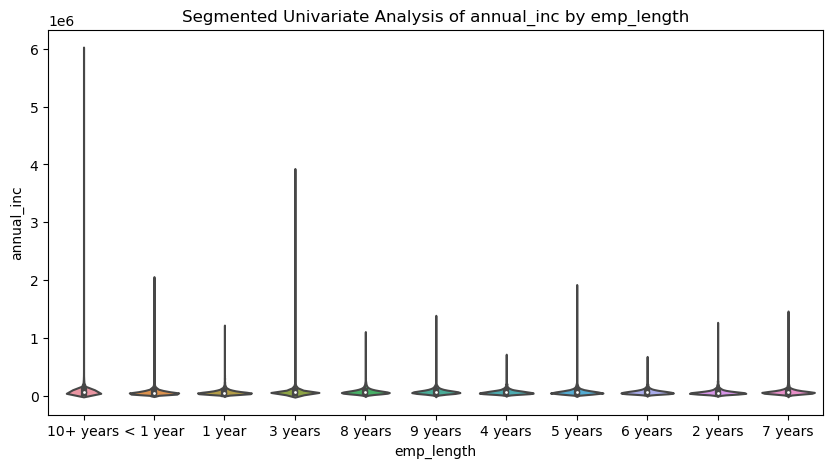

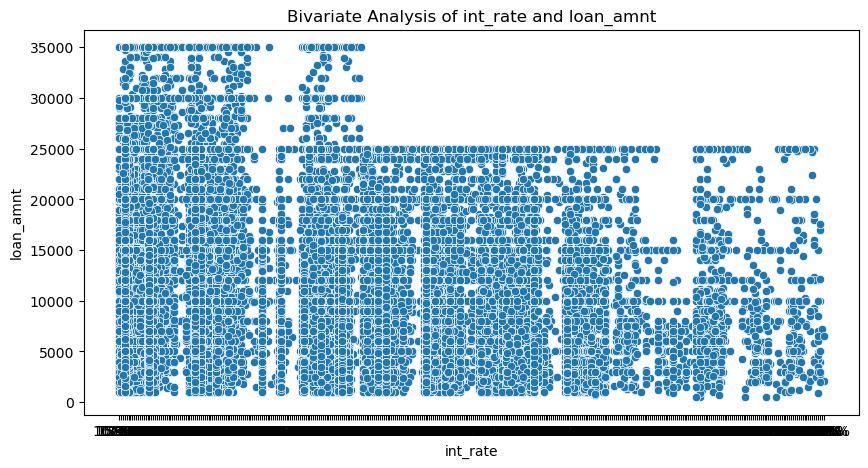

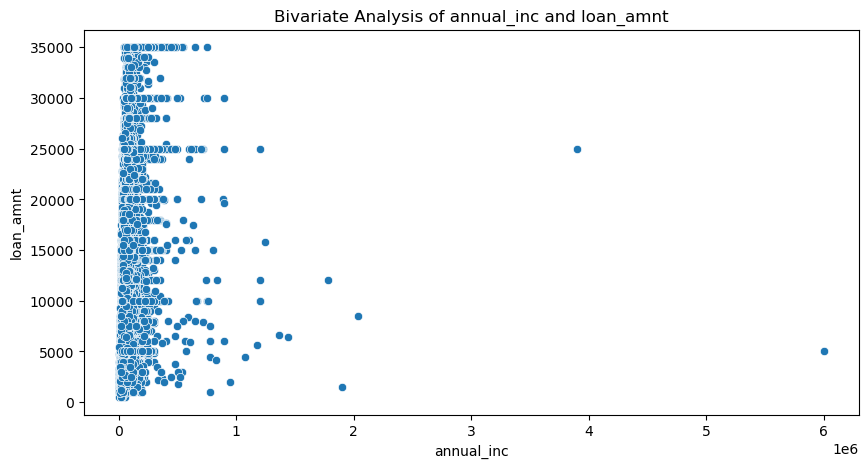

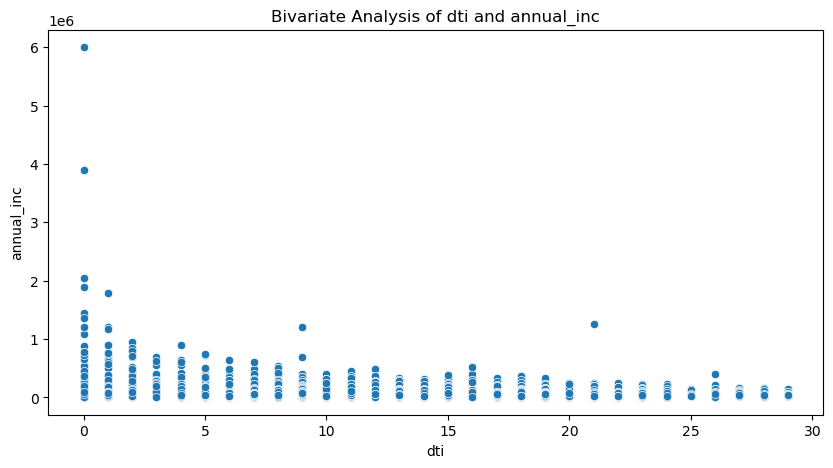

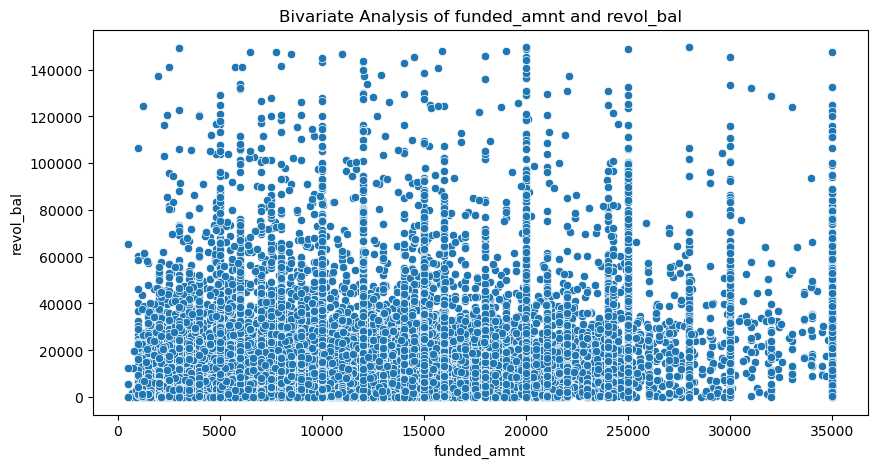

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
DataSetPath = r"C:\Upgrad\CaseStudy\loan\loan.csv"

CustomerLoanData = pd.read_csv(DataSetPath, low_memory=False)

CustomerLoanData['last_pymnt_amnt'] = pd.to_numeric(CustomerLoanData['last_pymnt_amnt'], errors='coerce')
CustomerLoanData['last_pymnt_amnt'] = CustomerLoanData['last_pymnt_amnt'].astype(float)
CustomerLoanData['last_pymnt_amnt'].fillna(CustomerLoanData['last_pymnt_amnt'].mean(), inplace=True)
CustomerLoanData.dropna(subset=['last_pymnt_amnt'], inplace=True)


CustomerLoanData['annual_inc'] = pd.to_numeric(CustomerLoanData['annual_inc'], errors='coerce')
CustomerLoanData['annual_inc'] = CustomerLoanData['annual_inc'].astype(int)
CustomerLoanData['annual_inc'].fillna(CustomerLoanData['annual_inc'].mean(), inplace=True)
CustomerLoanData.dropna(subset=['annual_inc'], inplace=True)


CustomerLoanData['dti'] = pd.to_numeric(CustomerLoanData['dti'], errors='coerce')
CustomerLoanData['dti'] = CustomerLoanData['dti'].astype(int)
CustomerLoanData['dti'].fillna(CustomerLoanData['dti'].mean(), inplace=True)
CustomerLoanData.dropna(subset=['dti'], inplace=True)


CustomerLoanData['loan_amnt'] = pd.to_numeric(CustomerLoanData['loan_amnt'], errors='coerce')
CustomerLoanData['loan_amnt'] = CustomerLoanData['loan_amnt'].astype(int)
CustomerLoanData['loan_amnt'].fillna(CustomerLoanData['loan_amnt'].mean(), inplace=True)
CustomerLoanData.dropna(subset=['loan_amnt'], inplace=True)

# Univariate Analysis
def univariate_analysis(CustomerLoanData, column):
    plt.figure(figsize=(10, 5))
    sns.histplot(CustomerLoanData[column].dropna(), kde=True)
    plt.title(f'Univariate Analysis of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Segmented Univariate Analysis
def segmented_univariate_analysis(CustomerLoanData, column, segment_by):
    plt.figure(figsize=(10, 5))
    if CustomerLoanData[column].dtype in ['float64', 'int64']:
        sns.boxplot(x=segment_by, y=column, data=CustomerLoanData)
    else:
        sns.violinplot(x=segment_by, y=column, data=CustomerLoanData)
    plt.title(f'Segmented Univariate Analysis of {column} by {segment_by}')
    plt.xlabel(segment_by)
    plt.ylabel(column)
    plt.show()

# Bivariate Analysis
def bivariate_analysis(CustomerLoanData, column1, column2):
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=column1, y=column2, data=CustomerLoanData)
    plt.title(f'Bivariate Analysis of {column1} and {column2}')
    plt.xlabel(column1)
    plt.ylabel(column2)
    plt.show()

# Perform Univariate Analysis
univariate_columns = ['annual_inc', 'dti', 'loan_amnt', 'revol_bal']
for column in univariate_columns:
    univariate_analysis(CustomerLoanData, column)


# Perform Segmented Univariate Analysis
segmented_columns = [('loan_amnt', 'home_ownership'), ('annual_inc', 'emp_length')]
for column, segment_by in segmented_columns:
    segmented_univariate_analysis(CustomerLoanData, column, segment_by)

# Perform Bivariate Analysis
bivariate_columns = [('int_rate', 'loan_amnt'), ('annual_inc', 'loan_amnt'), ('dti', 'annual_inc'), ('funded_amnt', 'revol_bal')]
for column1, column2 in bivariate_columns:
    bivariate_analysis(CustomerLoanData, column1, column2)
# Insights and observations can be derived from the visualizations produced by these functions.

